# Deep Deterministic Policy Gradient for Portfolio Management

Steps to try:
1. We first try to overfit a 3 stocks toy case using 3 years of training data.
2. Try to generalize to other years of the same stock.
3. Get some insigts on network topology and hyperparameter tuning.
4. Increase the number of stocks. (Increase action space to more than 10.)

## Setup

In [1]:
import numpy as np
from utils.data import read_stock_history, index_to_date, date_to_index
import matplotlib.pyplot as plt
# for compatible with python 3
from __future__ import print_function
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%qtconsole

In [7]:
# read the data and choose the target stocks for training a toy example
history, abbreviation = read_stock_history(filepath='utils/datasets/stocks_history_target.h5')
history = history[:, :, :4]
target_stocks = ['AAPL', 'CMCSA', 'REGN']
training_date_start = '2012-08-13'
training_date_end = '2015-08-13'  # three years training data
training_index_start = date_to_index(training_date_start)
training_index_end = date_to_index(training_date_end)
target_history = np.empty(shape=(len(target_stocks), training_index_end - training_index_start, history.shape[2]))
for i, stock in enumerate(target_stocks):
    target_history[i] = history[abbreviation.index(stock), training_index_start:training_index_end, :]

In [8]:
print(target_history.shape)

(3, 1095, 4)


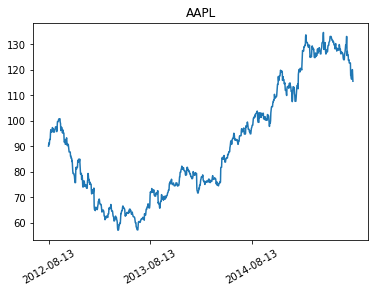

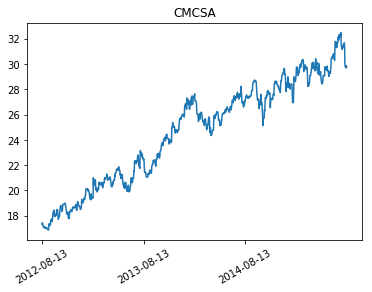

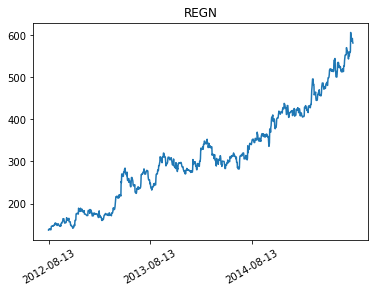

In [9]:
# visualize 3 stock open price
date_list = [index_to_date(i) for i in range(target_history.shape[1])]
x = range(target_history.shape[1])
for i in range(len(target_stocks)):
    plt.figure(i)
    plt.plot(x, target_history[i, :, 1])  # open, high, low, close = [0, 1, 2, 3]
    plt.xticks(x[::365], date_list[::365], rotation=30)
    plt.title(target_stocks[i])
    plt.show()

In [33]:
from environment.portfolio import PortfolioEnv

In [34]:
# instantiate environment, 3 stocks, no trading cost, window_length 50, start_date sample each time
env = PortfolioEnv(target_history, target_stocks, trading_cost=0.0)

Start date: 2012-12-23


In [68]:
from model.ddpg.ddpg import DDPG

In [69]:
# instantiate DDPG model
ddpg_model = DDPG(env=env)

Model load successfully


In [ ]:
# starts to train the model, hopefully it would work
ddpg_model.train(verbose=False)

Start date: 2013-03-02
Start date: 2013-07-04
Start date: 2013-05-25
Start date: 2012-11-10
Start date: 2013-02-18
Start date: 2013-01-03
Start date: 2013-06-19
Start date: 2012-10-09
Start date: 2013-04-22
Start date: 2013-01-23
Start date: 2013-06-03
Start date: 2013-07-06
Start date: 2013-07-25
Start date: 2012-12-03
Start date: 2013-05-18
Start date: 2013-07-21
Start date: 2013-05-02
Start date: 2012-10-02
Start date: 2013-06-12
Start date: 2013-06-01
Start date: 2013-08-07
Start date: 2013-07-21
Start date: 2013-05-22
Start date: 2013-01-16
Start date: 2013-07-20
Start date: 2013-06-15
Start date: 2013-03-22
Start date: 2013-03-23
Start date: 2013-07-12
Start date: 2013-02-06
Start date: 2013-07-21
Start date: 2013-05-21
Start date: 2013-06-18
Start date: 2013-08-09
Start date: 2013-02-01
Start date: 2012-10-25
Start date: 2013-05-19
Start date: 2013-02-07
Start date: 2013-03-27
Start date: 2013-03-24
Start date: 2013-02-13
Start date: 2013-01-28
Start date: 2013-06-08
Start date: